<div align="center">
    <h1>DS-210: Programming for Data Science</h1>
    <h1>Lecture 37</h1>
</div>

# 1. Styles of Parallel Programming

# 2. Limits of Parallelism (Amdahl's law)

# 3. Examples of parallel programs

## Attendance: https://piazza.com/class/lrat4tm83gbnz

# <font color="red">1. Styles of Parallel Programming <font>

# 2. Limits of Parallelism (Amdahl's law)

# 3. Examples of parallel programs


* Instruction level parallelism
  * Done at the hardware level.  CPU determines independent instructions and executes them in parallel! Often assisted by the compiler which arranges instruction so contiguous instructions can be executed concurrently.
* Thread level parallelism
  * Done at the software level.  Programmer or compiler decomposes program onto mostly independent parts and creates separate threads to execute them.
* Message passing between threads
  * When coordination or data exchange needs arise in #2 the coordination and or data exchange happens by explicitly sending messages between threads.
* Shared memory between threads
  * Threads share all the memory and use locks/barriers to coordinate between them (more below).
* Pipeline Parallelism
  * Output of one thread is input to another
* Data parallelism
  * Each thread works on a different part of the data

# 1. Styles of Parallel Programming 

# <font color="red"> 2. Limits of Parallelism (Amdahl's law)<font>

# 3. Examples of parallel programs


Let an algorithm A have a serial S and a parallel P part.  Then the time to execute G is:
$$T_A = T_{SA} + T_{PA}$$
Running on multiple processors only affects $T_{PA}$

$$T_{A}(n) = T_{SA} + \frac{T_{PA}}{n}$$ which as ${n\to\infty}$ becomes $T_{A}(n) = T_{SA}$

So the maximum possible speedup for a program is $$\frac{T_{A}}{T_{SA}}$$

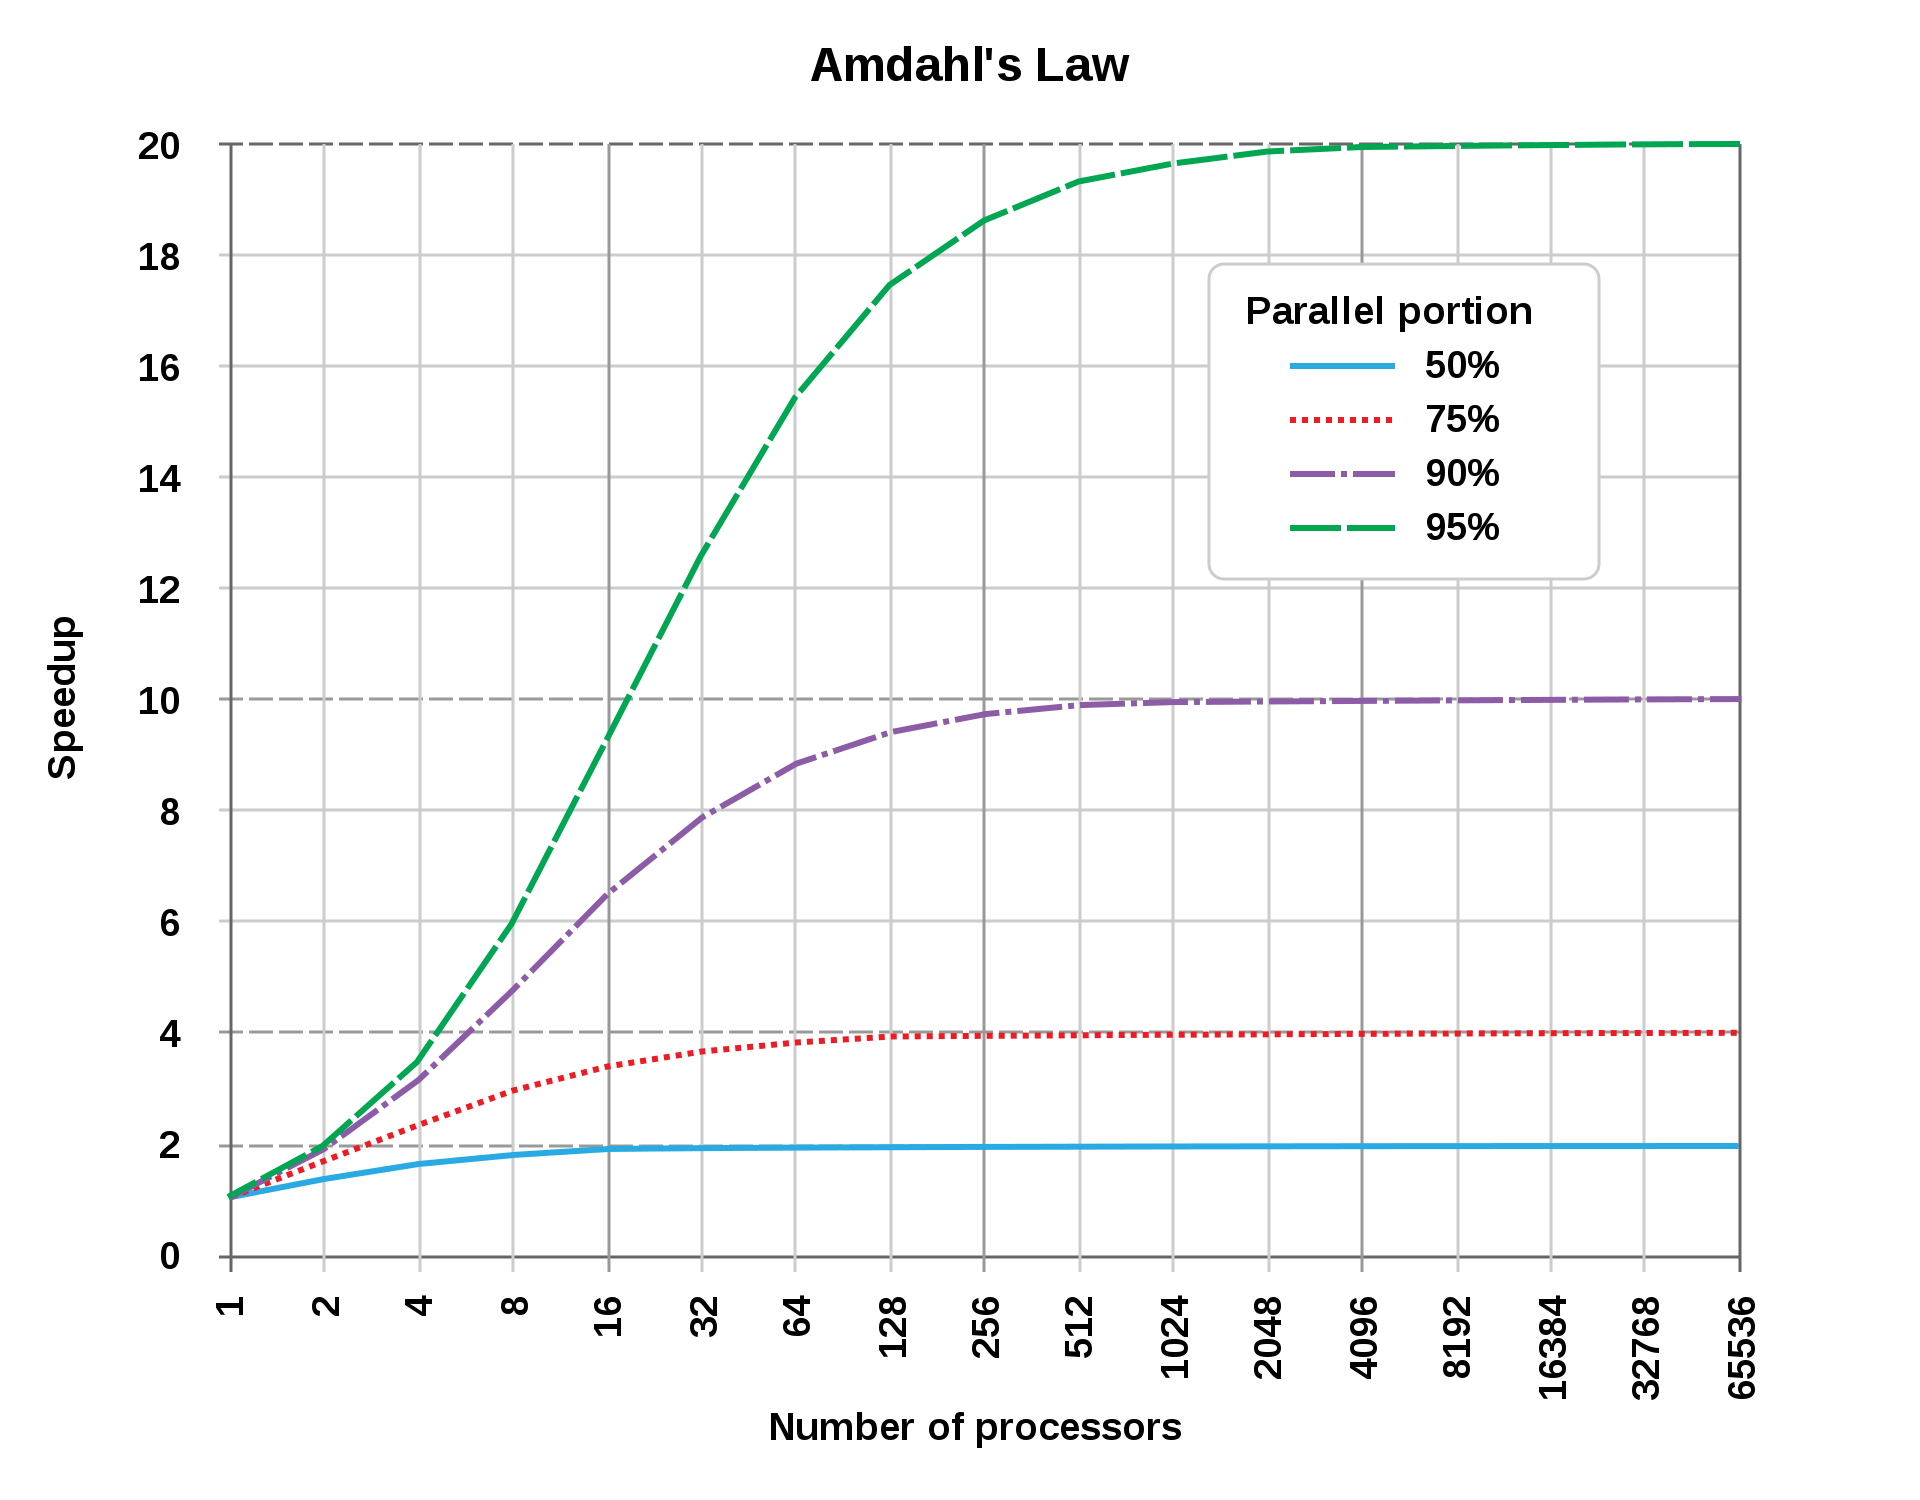

# 1. Styles of Parallel Programming 

# 2. Limits of Parallelism (Amdahl's law)

# <font color="red"> 3. Examples of parallel programs <font>


## Message passing between threads

In [4]:
use std::thread;
use std::sync::mpsc;
use std::time::Duration;


fn communicate(id:i32, tx: mpsc::Sender<String>, rx:mpsc::Receiver<&str>) {
   let t = format!("Hello from thread {}", id);
   tx.send(t).unwrap();
   let a:&str = rx.recv().unwrap();
   println!("Thread {} received {}", id, a);
}

fn main_thread() {

    let (tx1, rx1) = mpsc::channel();
    let (tx2, rx2) = mpsc::channel();
    // let handle1 = 
    let handle1 = thread::spawn(move || {
       communicate(1, tx1, rx2);
    });

    let (tx3, rx3) = mpsc::channel();
    let (tx4, rx4) = mpsc::channel();

    // let handle2 = 
    let handle2 = thread::spawn(move || {
       communicate(2, tx3, rx4);
    });

    let a:String = rx1.recv().unwrap();
    let b:String = rx3.recv().unwrap();
    println!("Main thread got \n{}\n{}\n\n", a, b);
    tx2.send("Hi from main").unwrap();
    tx4.send("Hi from main").unwrap();
    thread::sleep(Duration::from_millis(5000));
    handle1.join().unwrap();
    handle2.join().unwrap();
}

main_thread();

Main thread got 
Hello from thread 1
Hello from thread 2


Thread 1 received Hi from main
Thread 2 received Hi from main


## Sharing Memory using Exclusive Locks or Reader/Writer Locks (follow on terminal @16 @8K)

### Important data structures

* std::sync::Arc
* std::sync::Mutex
* std::sync::RwLock

## What if you want to write into your shared data structure?  It can be done as long as the written parts are separable (follow on terminal @16 @8K)

### Important data structures
* Vec.chunks_mut(chunk_size)
* rayon::scope.spawn()

## Put it all together Parallel Game of Life (follow on terminal use 2K matrix to see benefits)

## Try and take advantage of the builtin par_** methods for regular problems.  Gaussian elimination example (follow on terminal 1K matrix)

### Important data structures

* par_iter_mut()
* ThreadPoolBuilder()